<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

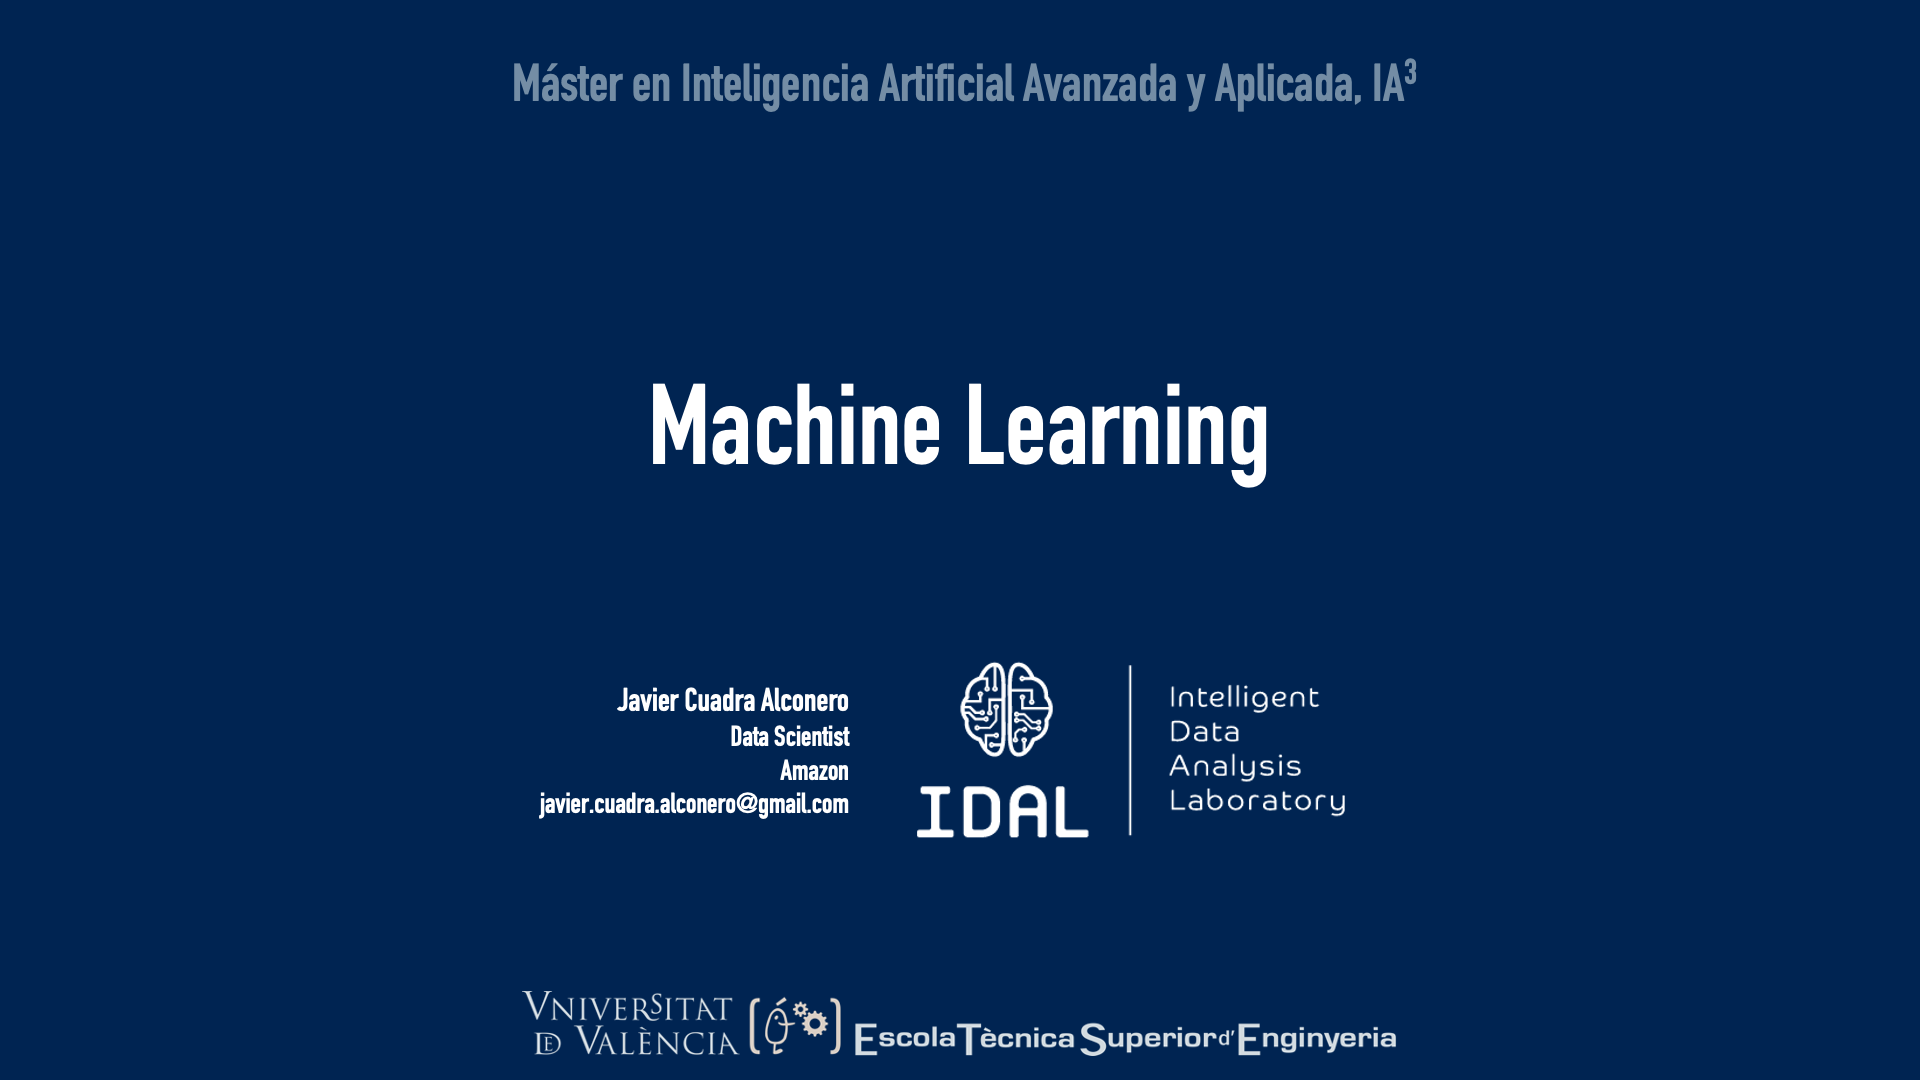

Bienvenidos a la introducción de Machine Learning, antes de comenzar a trabajar en la materia vamos a definir algunos conceptos a modo de Glosario para evitar confusiones en el resto del módulo.

- Dataset: Conjunto de datos sobre el que se realizará el aprendizaje del modelo. Una fuente de datos es siempre necesaria para comenzar a plantear un proyecto de ML o DL.

- Features, características o variables: Parte del conjunto de datos que sirve de entrada para el modelo. En el futuro será necesario disponer del mismo conjunto de datos para poder realizar predicciones.

- Variable target u objetivo: Conjunto de datos que se pretende predecir. Durante el entrenamiento es necesario adjuntar un target a cada entrada del conjunto de características. Es importante matizar, que existen áreas del Machine Learning que no necesitan de una variable objetivo.

- Modelo: Algoritmo matemático con capacidad de aprendizaje sobre un conjunto de datos. La entrada de un modelo siempre será un conjunto de características y a la salida se obtiene una predicción.

- Training o entrenamiento: Proceso de aprendizaje del algoritmo que permite al modelo establecer relaciones entre las características del conjunto de datos y la variable target u otro resultado analítico.

- Función de pérdida o coste: Función matemática que permite penalizar al modelo y guiar su aprendizaje en función de lo preciso de sus predicciones. Es una parte crucial del proceso de aprendizaje.

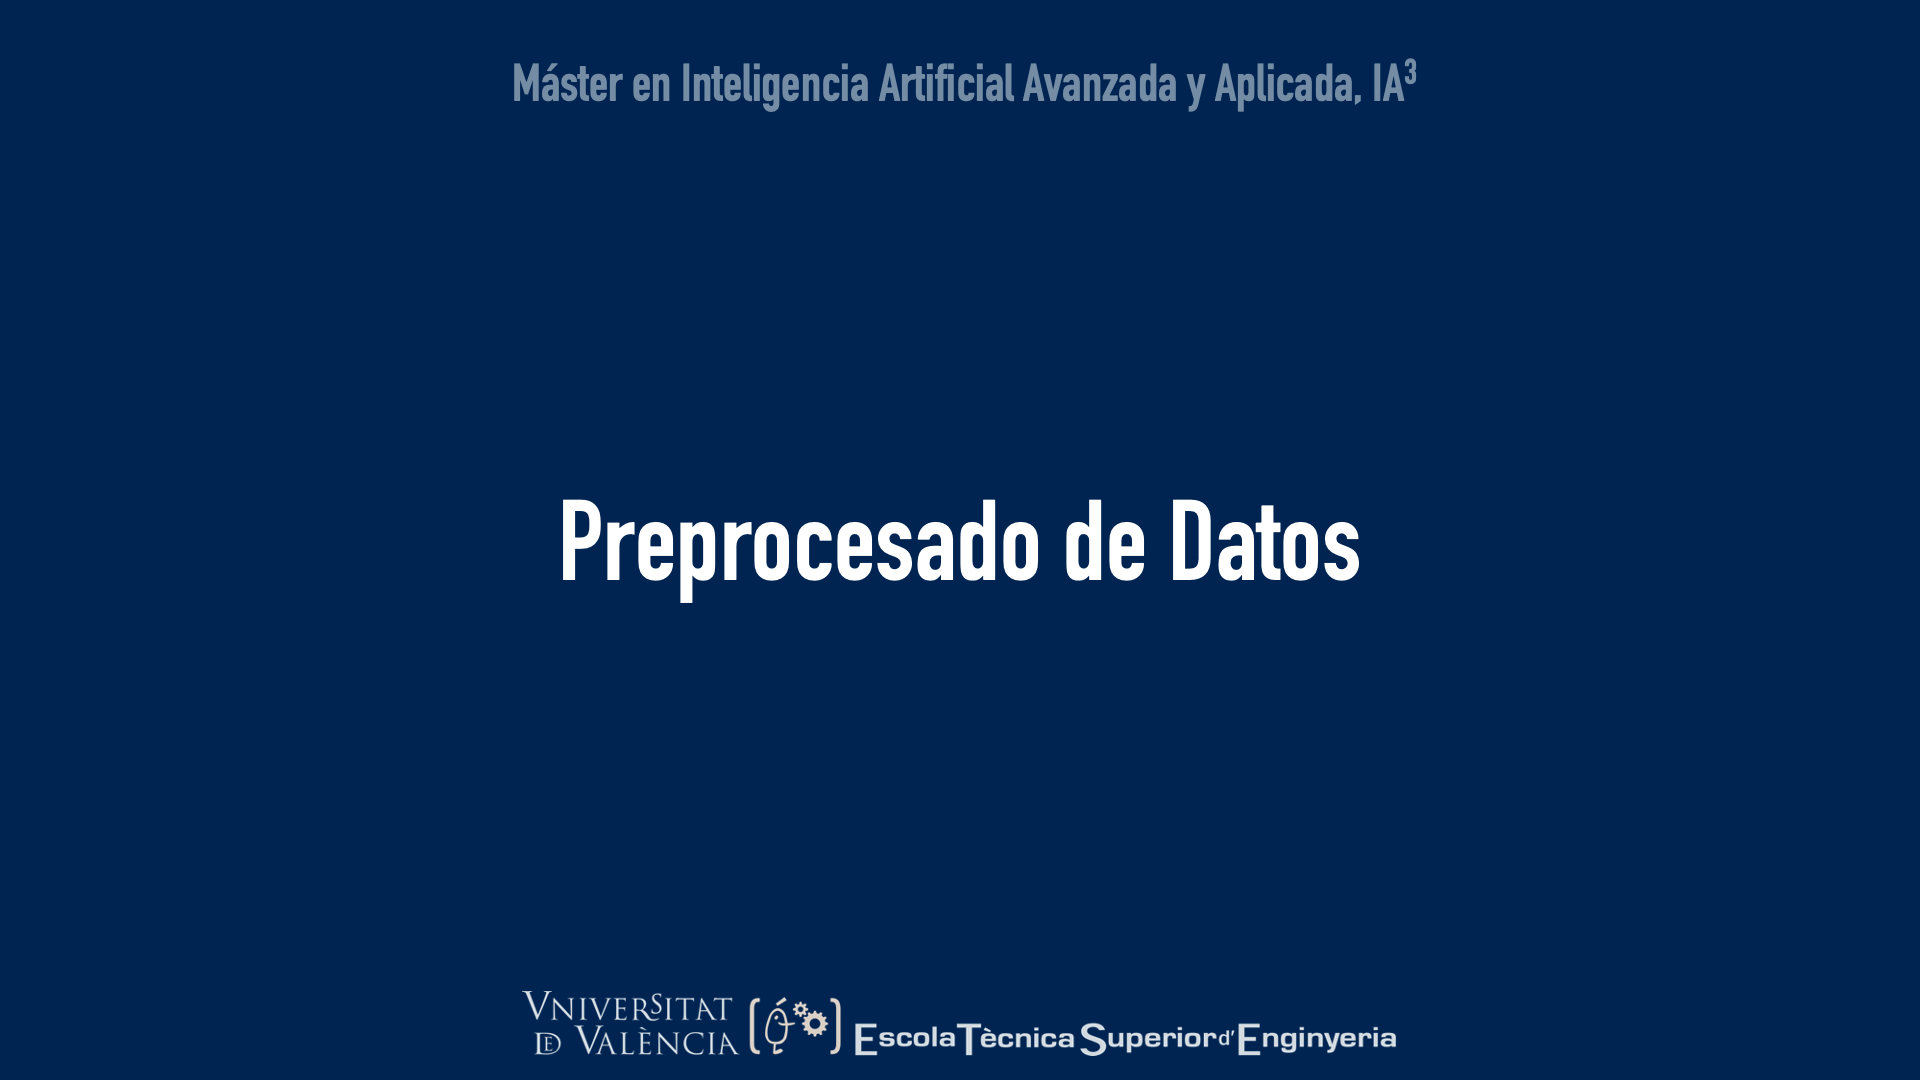

Comencemos nuestro aprendizaje en ML aprendiendo a manejar y transformar un conjunto de datos. Comencemos descargando un conjunto de datos

In [40]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [3]:
dataset = sns.load_dataset("iris")

In [4]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Realicemos un pequeño ejercicio de estadística descriptiva, antes de comenzar a modelar es conveniente comprender la información que estamos tratando. Para ello calculad los siguientes parámetros:

- Obtened un pequeño informe estadístico utilizando el método describe del dataframe dataset.
- Comprobad que no existe ningún valor nulo en el dataset.
- Construíd una función que os permita separar las características (features) de vuestro target. En nuestro caso la variable target es "species".
- Calculad la correlación de las características numéricas. Método corr del dataframe dataset.
- Comprobad el número de valores únicos de la variable target. Método unique de la serie "species".


In [5]:
# Escribid en diferentes celdas vuestro código

Para continuar con nuestro ejercicio de estadística descriptiva visualicemos la información contenida en nuestro dataset. Para ello utilizaremos la librería plotly express y el método scatter y scatter_3d.

In [6]:
fig = px.scatter(dataset, x="sepal_length", y="petal_length" , color="species")
fig.show()

Dibujad varias gráficas utilizando el código mostrado en la celda anterior y escribid unas pequeñas conclusiones sobre lo visualizado en el código. Si lo preferís, podéis utilizar también el método scatter_3d para realizar una gráfica en 3d.

In [ ]:
# Escribid en diferentes celdas vuestro código

Como las diferentes gráficas que habéis construído muestran es posible separar el espacio de características en función del tipo de flor. Revisemos ahora la familia de ejercicios que pertenecen al aprendizaje supervisado.

### Aprendizaje Supervisado

La familia de algoritmos y problemas pertenecientes al aprendizaje supervisado trata de aquellos en los que se pretende predecir una variable target utilizando un conjunto de características.

### Regresión

Los ejercicios de la familia de regresión pretenden obtener un valor numérico utilizando un conjunto de características.

### Clasificación

Los ejercicios de la familia de clasificación pretenden separar el espacio de características en función de la variable target. 


### Pregunta para la clase:

¿Qué tipo de ejercicio deberíamos aplicar al dataset del que disponemos?

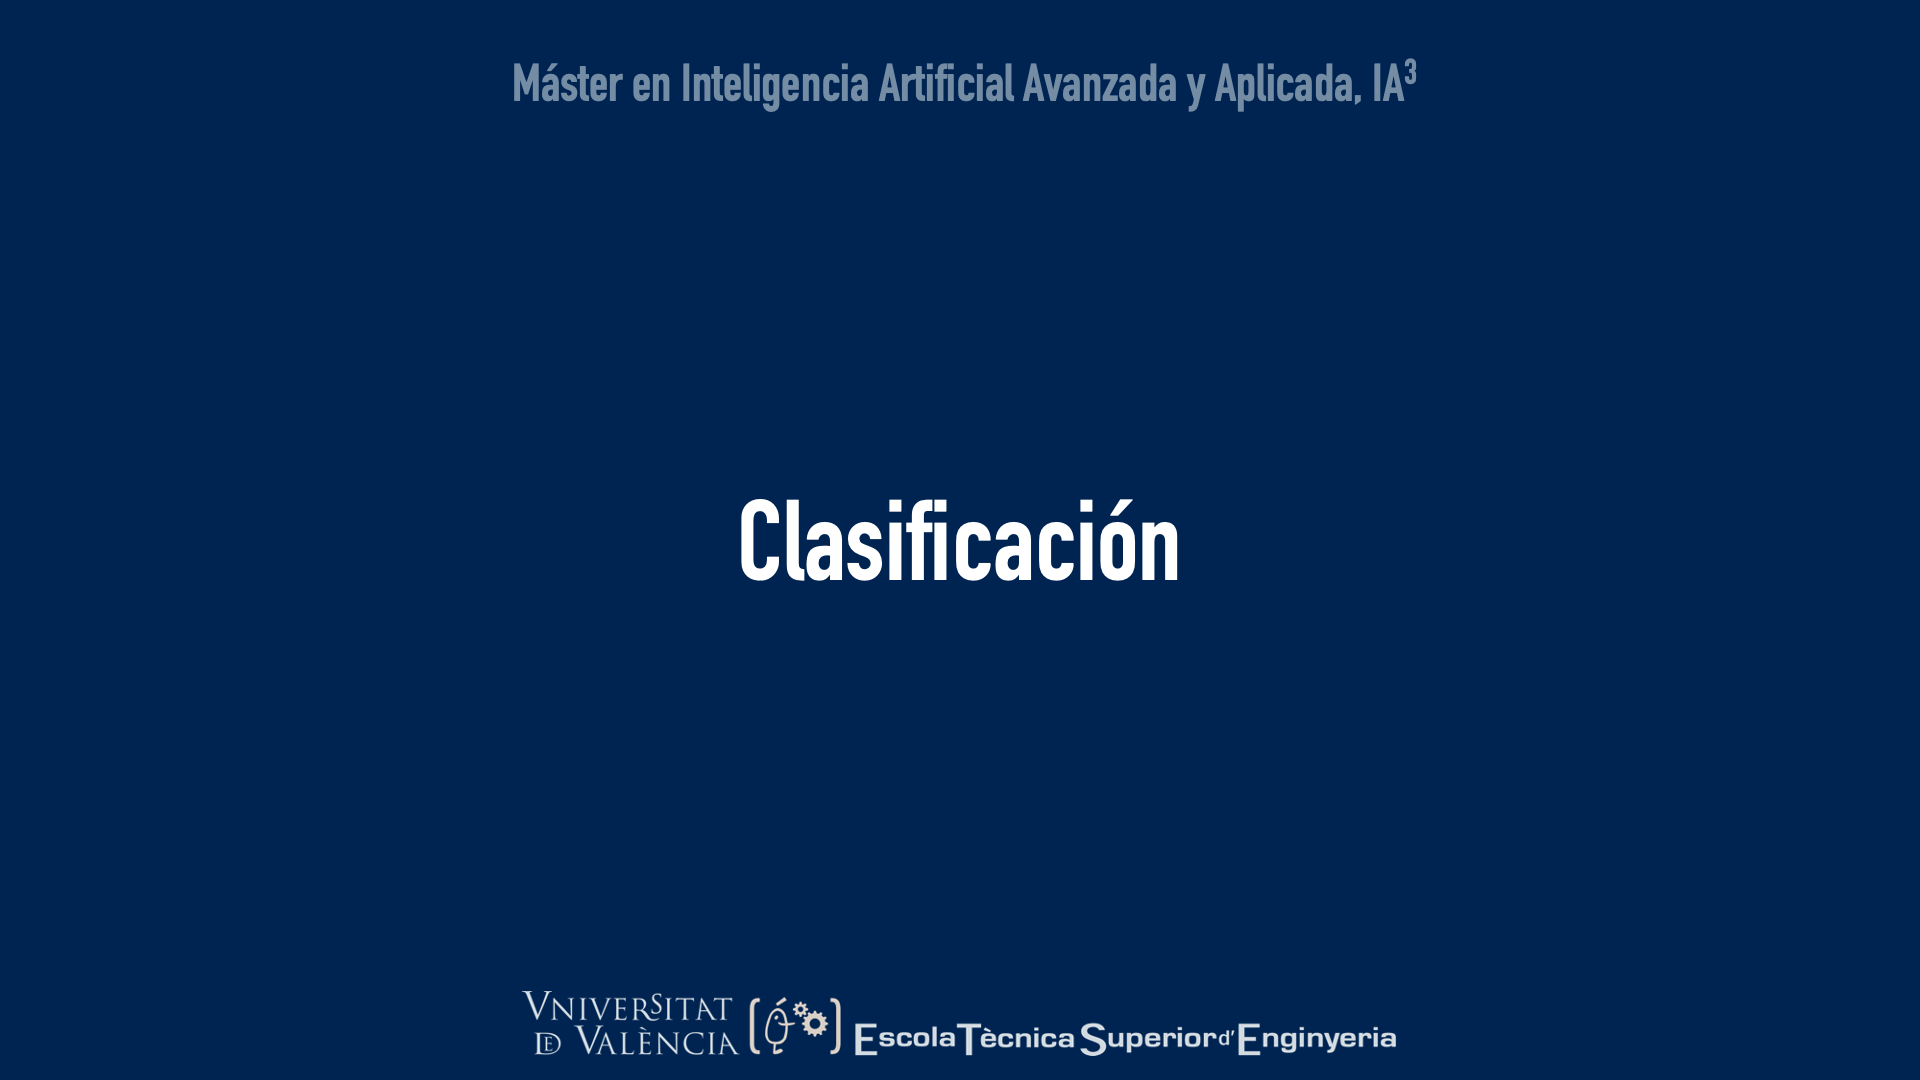

Continuemos utilizando el dataset expuesto hasta ahora. El ejercicio que os propongo realizar es una clasificación de manera manual. Para ello representad algunas gráficas que os permitan visualizar el espacio de características y utilizad la siguiente función para clasificar el espacio.

In [32]:
def transform_classes(y, class_name):
  new_classes = []
  for sample in y:
    if sample == class_name:
      new_sample = True
    else:
      new_sample = False
    new_classes.append(new_sample)
  return new_classes

def basic_classifier(df, thresholds, class_name):
  variables = list(thresholds.keys())
  X = df.loc[:, variables]
  Y = transform_classes(df["species"], class_name)
  iterable = X.iterrows()
  thresholds_df = pd.DataFrame.from_dict(thresholds, orient="index")
  min_series = thresholds_df[0]
  max_series = thresholds_df[1]
  classification = []
  for _, row in iterable:
    bool_array = (row > min_series) & (row < max_series)
    if bool_array.all():
      classified_sample = True
    else:
      classified_sample = False
    classification.append(classified_sample)
  return classification, Y

In [41]:
# Ejemplo

thresholds = {"petal_width":[0.5, 3], "petal_length":[1, 4]}

classification, Y = basic_classifier(dataset, thresholds, "setosa")

# Evaluación

print(accuracy_score(Y, classification))
print(recall_score(Y, classification))

0.6
0.02


Como habéis podido observar el ejercicio de clasificación es un ejercicio de aprendizaje de espacios y búsqueda de una separación perfecta basadas en la clase. Algunas observaciones que deberíais haber hecho en este ejercicio:

- Conforme aumenta el número de variables aumenta la dificultad de reconocimiento del espacio y no siempre acarrea mejores resultados. Esto significa que tener más posibilidades para separar vuestro espacio no siempre os va a acarrear ventajas.

- Una separación perfecta no siempre es posible, hay que encontrar un equilibrio entre la precisión que podréis obtener en las distintas clases y un error aceptable.

- El manejo de la información es extremedamente complejo, conforme aumentan vuestras fuentes de información estudiar las características de manera manual se vuelve imposible, es justo en este tipo de problemas donde encaja la tecnología de Machine Learning.

Cabe preguntarse que tipo de algoritmo se debería utilizar en cada problema. Lamentablemente, no existe una respuesta clara a esta pregunta. Nada nos garantiza que un modelo más complejo pudiera obtener una evaluación mejor que nuestro modelo simple basado en thresholds (umbrales). Es importante que testéis diferentes técnicas y os apoyéis en visualizaciones siempre que sea posible para elegir la técnica más apropiada.

Por norma general, cuando comencéis un ejercicio de analítica, es recomendable que elijáis diferentes técnicas que os permita comparar resultados para decidir cual puede adaptarse mejor a vuestro dataset.

Finalmente, es importante matizar que muchos algoritmos y datasets no os permitirán obtener una representación gráfica de vuestra clasificación o realizar una interpretación clara de vuestros modelos. En estos casos realizar una evaluación precisa, basada en la estadística, es más importante que nunca, pues vuestras mediciones deben aportar el valor extra que la visualización del espacio permite en otros conjuntos.

En el siguiente apartado vamos a estudiar los modelos conocidos como árboles de decisión, dada su importancia en la construcción de modelos más complejos y técnicas avanzadas. Sin embargo, si queréis obtener un resumen de ejercicios de clasificación y de los algoritmos más conocidos podéis darle un vistazo al siguiente artículo:

https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623